**Importing Python Libraries**

In [ ]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
import math

**Data Importing**

In [ ]:
df = pd.read_csv('DST25.csv')
df.head()

,Current(A),Voltage(V),Charge_Capacity(Ah),Discharge_Capacity(Ah),A,SOC,SOC%
0,0.000000,3.938208,0.000000,0.0,0.0,1.0,100.0
1,0.999834,4.020122,0.002777,0.0,0.0,1.0,100.0
2,0.999834,4.025464,0.005555,0.0,0.0,1.0,100.0
3,1.000014,4.029349,0.008337,0.0,0.0,1.0,100.0
4,0.999834,4.032263,0.011118,0.0,0.0,1.0,100.0


In [ ]:
X =df.drop(['Charge_Capacity(Ah)','Discharge_Capacity(Ah)', 'A', 'SOC', 'SOC%'], axis=1)
X = X.dropna()
print(X)

      Current(A)  Voltage(V)
0       0.000000    3.938208
1       0.999834    4.020122
2       0.999834    4.025464
3       1.000014    4.029349
4       0.999834    4.032263
...          ...         ...
7195   -2.499652    3.411270
7196    0.999834    3.663326
7197    0.999653    3.667049
7198    0.999834    3.670125
7199    1.000014    3.672877

[7200 rows x 2 columns]


**Moving Average Filter for Input Quantities**

In [ ]:
L=7200 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = 1  #denominator co-effs of filter transfer function
Xf = signal.lfilter(b,a,X) #filter output using lfilter function
print(Xf)

[[0.         0.00054697]
 [0.00013887 0.00069722]
 [0.00013887 0.00069796]
 ...
 [0.00013884 0.00064815]
 [0.00013887 0.00064861]
 [0.00013889 0.00064901]]


             0         1
0     0.000000  0.000547
1     0.000139  0.000697
2     0.000139  0.000698
3     0.000139  0.000699
4     0.000139  0.000699
...        ...       ...
7195 -0.000347  0.000127
7196  0.000139  0.000648
7197  0.000139  0.000648
7198  0.000139  0.000649
7199  0.000139  0.000649

[7200 rows x 2 columns]


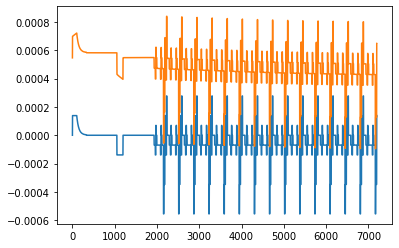

In [ ]:
Xf1 = pd.DataFrame(Xf)
print(Xf1)
plt.plot(Xf1)

**Data Normalization**

             0         1
0     0.333360  0.371966
1     0.666526  0.692915
2     0.666526  0.694500
3     0.666586  0.695706
4     0.666526  0.696517
...        ...       ...
7195 -0.499579 -0.526007
7196  0.666526  0.587056
7197  0.666466  0.588107
7198  0.666526  0.589073
7199  0.666586  0.589943

[7200 rows x 2 columns]


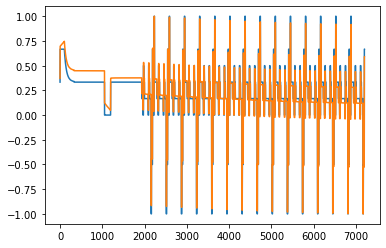

In [ ]:
df_min_max_scaled = Xf1.copy()  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = -1 + 2*(df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    Xn = df_min_max_scaled.copy()
# view normalized data
print(Xn)
plt.plot(Xn)

In [ ]:
Y =df.drop(['Current(A)','Voltage(V)','Charge_Capacity(Ah)','Discharge_Capacity(Ah)','A','SOC%'], axis=1)
Y = Y.dropna()
print(Y)

               SOC
0     1.000000e+00
1     1.000000e+00
2     1.000000e+00
3     1.000000e+00
4     1.000000e+00
...            ...
7195  1.823860e-04
7196 -2.220460e-07
7197 -2.220460e-07
7198 -2.220460e-07
7199 -2.220460e-07

[7200 rows x 1 columns]


**Dataset Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split
train_Xn, test_Xn, train_Y, test_Y = train_test_split(Xn, Y,train_size=0.7,test_size=0.3)
print("Labels for training and testing data")
print(train_Y)
print(test_Y)
print(train_Xn)
print(test_Xn)

Labels for training and testing data
           SOC
3408  0.504586
306   1.000000
1895  0.697937
7065  0.028550
2564  0.608010
...        ...
5353  0.256484
3199  0.539060
5144  0.275169
997   1.000000
4440  0.368890

[5040 rows x 1 columns]
           SOC
5006  0.302281
1779  0.697937
6120  0.141634
6631  0.081854
2006  0.691339
...        ...
75    1.000000
6396  0.117077
4033  0.416097
3928  0.443756
949   1.000000

[2160 rows x 1 columns]
             0         1
3408  0.500060  0.495225
306   0.342802  0.457991
1895  0.333360  0.376481
7065  0.166707  0.119787
2564  0.000120  0.030011
...        ...       ...
5353  0.166767  0.139293
3199  0.166707  0.184052
5144  0.333353  0.301884
997   0.333360  0.447662
4440  0.166767  0.155383

[5040 rows x 2 columns]
             0         1
5006  0.166827  0.144534
1779  0.333360  0.376433
6120 -0.499639 -0.515638
6631  0.500120  0.442589
2006  0.166767  0.213452
...        ...       ...
75    0.666526  0.732252
6396  0.500120  0.444750
403

**Sigmoid Function**

In [ ]:
# defining the Sigmoid Function
def sigmoid (Xn):
    return 1/(1 + np.exp(-Xn))

# derivative of Sigmoid Function
def derivatives_sigmoid(Xn):
    return Xn * (1 - Xn)

**Initialization of Parameters**

In [ ]:
#Weights
w0 = 2*np.random.random((2, 3)) - 1 #for input   - 2 inputs, 1 outputs
w1 = 2*np.random.random((3, 3)) - 1 #for layer 1 - 2 inputs, 1 outputs
w2 = 2*np.random.random((3, 1)) - 1 #for layer 2 - 2 inputs, 1 outputs
#learning rate
n = 0.1
epoch = 500
hiddenlayer_neurons = 3
hiddenlayer = 2

In [ ]:
errors = []

**Feed-Forward Backpropagation**

In [ ]:
for i in range (epoch):

    #Feed forward network
    layer0 = train_Xn    #Input Layer
    layer1 = sigmoid(np.dot(layer0, w0))  #Hidden Layer 1
    layer2 = sigmoid(np.dot(layer1, w1))  #Hidden Layer 2
    layer3 = sigmoid(np.dot(layer2, w2))  #Output Layer 

    #Back propagation using gradient descent
    layer3_error = train_Y - layer3
    layer3_delta = layer3_error * derivatives_sigmoid(layer3)

    layer2_error = layer3_delta.dot (w2.T)
    layer2_delta = layer2_error * derivatives_sigmoid(layer2)

    layer1_error = layer2_delta.dot (w1.T)
    layer1_delta = layer1_error * derivatives_sigmoid(layer1)

    w2 += layer2.T.dot(layer3_delta) * n 
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

**Calculation of Accuracy of Training Model**

In [ ]:
accuracy_training = (1 - error) * 100

In [ ]:
print ("Training Accuracy of the model   " + str (round(accuracy_training,2)) + "%")

Training Accuracy of the model   SOC    85.59
dtype: float64%


**SOC Graph**

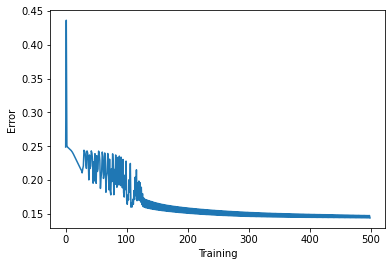

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()

**Mean Square Error Calculation**

In [ ]:
MSE = np.mean((train_Y - layer3)**2) # Mean Squared Error
print(MSE)
errors.append(MSE)

SOC    0.042941
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_Y,layer3)

0.04294094921504672

**Absolute Error Calculation**

In [ ]:
print(error) # Absolute Error Value

SOC    0.144114
dtype: float64


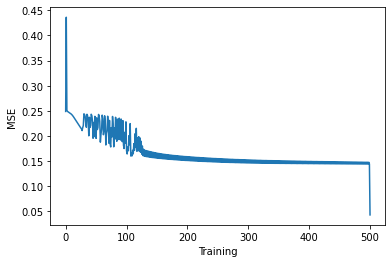

In [ ]:
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('MSE')# SOC 
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(train_Y,layer3)
layer2n = linear_regressor.predict(train_Y)

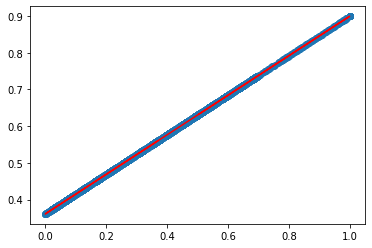

In [ ]:
plt.scatter(train_Y,layer2n)
plt.plot(train_Y, layer2n, color='red')
plt.show()

**Testing Part**

In [ ]:
#Testing
layer0t = test_Xn

layer1t = sigmoid(np.dot(layer0t, w0))
layer2t = sigmoid(np.dot(layer1t, w1))
layer3t = sigmoid(np.dot(layer2t, w2))

layer3t_error = test_Y - layer3t
error = np.mean(np.abs(layer3t_error))
errors.append(error)

**Testing Accuracy Calculation**

In [ ]:
accuracy_testing = (1 - error) * 100

In [ ]:
print ("Testing Accuracy of the model   " + str (round(accuracy_testing,2)) + "%")

Testing Accuracy of the model   SOC    84.85
dtype: float64%


**SOC error Graph**

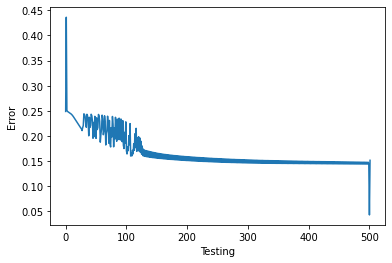

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('Error')
plt.show()

**Mean Square Error**

In [ ]:
MSE_T = np.mean((test_Y - layer3t)**2) # Mean Squared Error
print(MSE_T)
errors.append(MSE_T)

SOC    0.045472
dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_Y,layer3t)

0.045471820893367654

**Mean Absolute Error**

In [ ]:
print(error) # Absolute Error Value

SOC    0.151546
dtype: float64


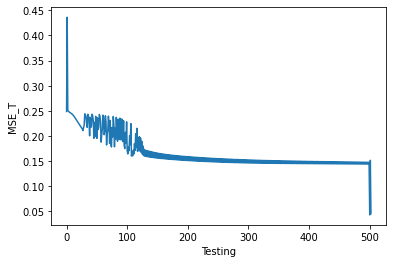

In [ ]:
plt.plot(errors)
plt.xlabel('Testing')
plt.ylabel('MSE_T')# SOC 
plt.show()